In [46]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import pandas as pd

seed = 239
rng = np.random.default_rng(seed)

## 1a)
Prove that:

\begin{equation*}
A=USV^T
\label{eq:vector_ray} \tag{1}
\end{equation*}

is equivalent to:

\begin{equation*}
A=\sum_{k}s_{k}\bf{u_{k}}v_{k}^T
\label{eq:vector_r} \tag{2}
\end{equation*}

First evaluate $US$
$$c_{ij} = \sum_k^nu_{ik}s_{kj}$$
Since $S$ is diagonal, $k=j$
$$c_{ij} = \sum_k^nu_{ik}s_{kj}\delta_{kj}$$
$$c_{ik} = \sum_k^nu_{ik}s_{kk}$$
Now evaluate $A=USV^T$
$$A_{ij} = \sum_k^nc_{ik}v^T_{kj}$$
$$A_{ij} = \sum_k^nu_{ik}s_{kk}v^T_{kj}$$
$$A_{ij} = \sum_k^ns_{kk}u_{ik}v^T_{kj}$$
$$A_{ij} = \sum_k^ns_{kk}u_{ik}v_{jk}$$
$$A_{ij} = \sum_k^ns_{kk}(\bf{u_k}v_k^T)_{ij}$$
$$A=\sum_{k}s_{k}\bf{u_{k}}v_{k}^T$$

This is of the same form as $A=\sum_{\alpha}s_{\alpha}\bf{u_{\alpha}}v_{\alpha}^T$

## 1b)

Compute $u_{\alpha}v_{\alpha}^T$ and the sum $A=\sum_{\alpha}s_{\alpha}u_{\alpha}v_{\alpha}^T$ and compare to the input $A$

In [61]:
# Define functions
def plot_matrices(A,titles=[]):
    '''Visualize matrices as a color map'''
    n = len(A)
    if titles==[]:
        titles = [""]*n
    if n>4:
        nx = 4
    else:
        nx = n
    for j in range(int(np.floor(n/4))+1):        
        plt.clf()
        plt.figure(figsize=(nx*4,4))
        jmax = 4*(j+1)
        if jmax > n:
            jmax = n
        for i,AA in enumerate(A[4*j:jmax]):
            plt.subplot(1, nx, i+1)
            plt.imshow(AA)
            plt.colorbar()
            plt.title(titles[4*j + i])
        plt.show()
        
def Get_Column(A,col):
    '''Accepts a matrix and column index and returns the corresponding column'''
    return(A[:,col]).reshape(len(A),1)

def Get_decomp(A,plotting):
    '''Accepts matrix and performs the decomposition in formula 2.
    Plots matrix if plotting=True'''
    m = np.shape(A)[0]
    n = np.shape(A)[1]
    U, Sdiag, VT = np.linalg.svd(A, full_matrices=False)
    V = VT.T
    
    A_decomp = np.zeros((m,n))
    for i in range(n):
        u_i = Get_Column(U,i)
        v_i = Get_Column(V,i)
        component_mat = u_i@(v_i.T)
        if plotting == True:
            plot_matrices([component_mat], titles=[r"$u_{\alpha}v_{\alpha}^T$ ($\alpha$ =  %i)"%i])
        A_decomp += Sdiag[i] * component_mat
    return A_decomp

<Figure size 640x480 with 0 Axes>

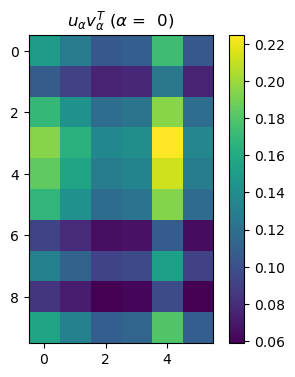

<Figure size 640x480 with 0 Axes>

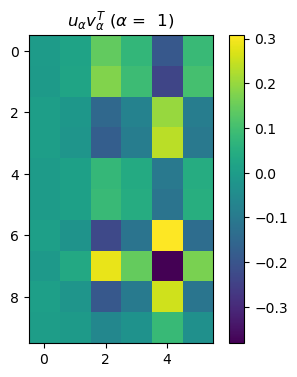

<Figure size 640x480 with 0 Axes>

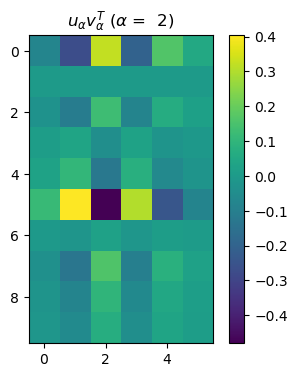

<Figure size 640x480 with 0 Axes>

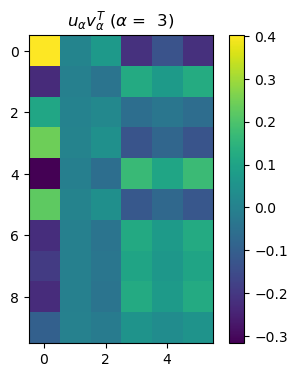

<Figure size 640x480 with 0 Axes>

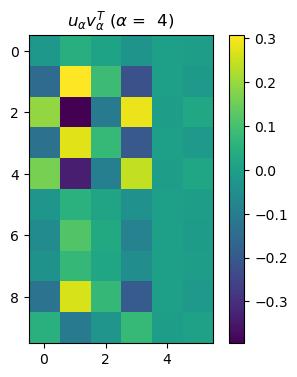

<Figure size 640x480 with 0 Axes>

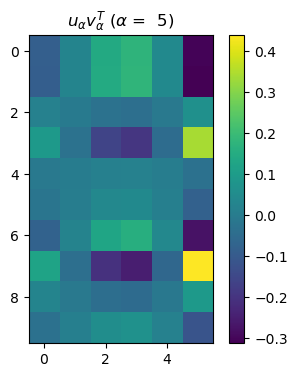

mean_error -1.5329173116048384e-16


In [62]:
m=10; n=6

A = np.random.rand(m*n).reshape(m,n)

A_decomp = Get_decomp(A,plotting=True)

mean_error = np.mean(A_decomp - A)
print('mean_error',mean_error)


In [4]:
mean_error = np.mean(A_decomp - A)
print('mean_error',mean_error)

mean_error 3.1548837616431533e-16


We see that we reach roundoff error for the difference between $A$ calculated from $A=\sum_{\alpha}s_{\alpha}\bf{u_{\alpha}}v_{\alpha}^T$ and the input $A$

## 1c)
Take only $s$ largest singular values and observe error as a function of $s$

smallest error 1.2943350095421617e-15


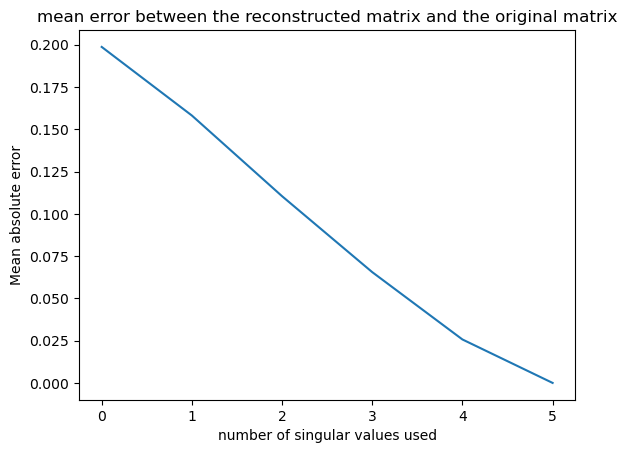

In [63]:
def Get_s_largest_decomp(A,s,plotting):
    '''Performs decomposition as in Get_decomp but only using the s largest
    singular values'''
    
    m = np.shape(A)[0]
    n = np.shape(A)[1]
    U, Sdiag, VT = np.linalg.svd(A, full_matrices=False)
    V = VT.T
    
    A_decomp = np.zeros((m,n))
    
    # Get s largest singular values and set the rest to 0
    Sdiag_largest_s = np.zeros(n)
    Sdiag_largest_s[:s+1] = Sdiag[:s+1]
    
    for i in range(s+1):
        if i >= np.shape(U)[1]:
            break
        u_i = Get_Column(U,i)
        v_i = Get_Column(V,i)
        component_mat = u_i@(v_i.T)
        if plotting == True:
            print('data',len(u_i)+len(v_i))
            plot_matrices([component_mat], titles=[r"$u_{a}v_{a}^T$ ($a$ =  %i)"%i])
        A_decomp += Sdiag_largest_s[i] * component_mat
    return A_decomp

m=10; n=6
A = np.random.rand(m*n).reshape(m,n)

mean_error = np.empty(n)
for s in range(n):
    A_decomp = Get_s_largest_decomp(A,s,plotting=False)
    mean_error[s] = np.mean(np.abs(A_decomp - A))

plt.plot(np.arange(s+1),mean_error)
plt.title('mean error between the reconstructed matrix and the original matrix')
plt.xlabel('number of singular values used')
plt.ylabel('Mean absolute error')

print('smallest error',mean_error[-1])

## 1d)
Using decomposition to compress an actual image

In [65]:
from PIL import Image
img = Image.open('github_logo.png')

data 522


<Figure size 640x480 with 0 Axes>

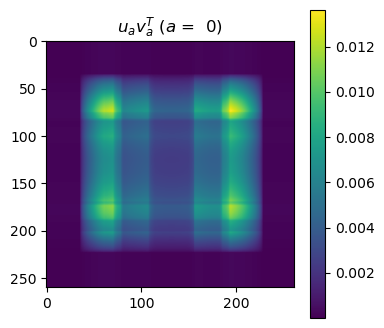

data 522


<Figure size 640x480 with 0 Axes>

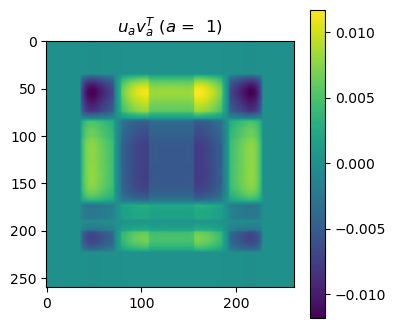

data 522


<Figure size 640x480 with 0 Axes>

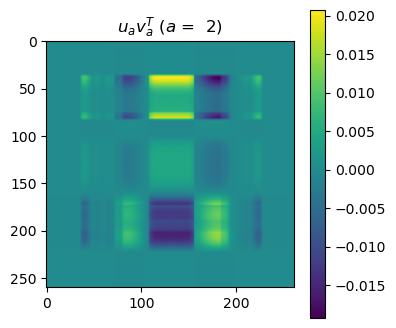

data 522


<Figure size 640x480 with 0 Axes>

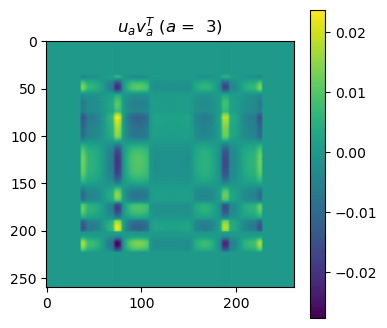

data 522


<Figure size 640x480 with 0 Axes>

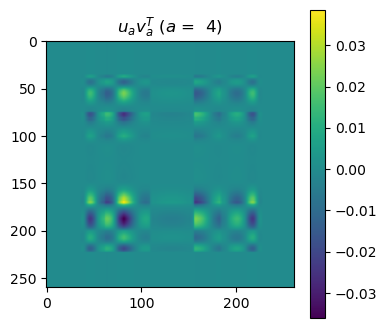

data 522


<Figure size 640x480 with 0 Axes>

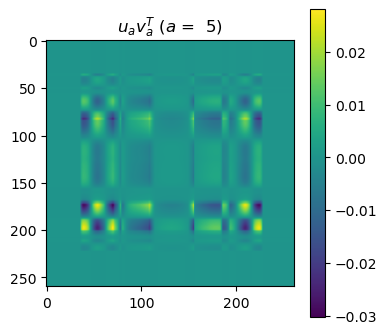

In [66]:
A = np.asarray(img)[:,:,0]   # the last index selects the RG or B component
m = np.shape(A)[0]
n = np.shape(A)[1]

s = 5
A_decomp = Get_s_largest_decomp(A,s,plotting=True)

<Figure size 640x480 with 0 Axes>

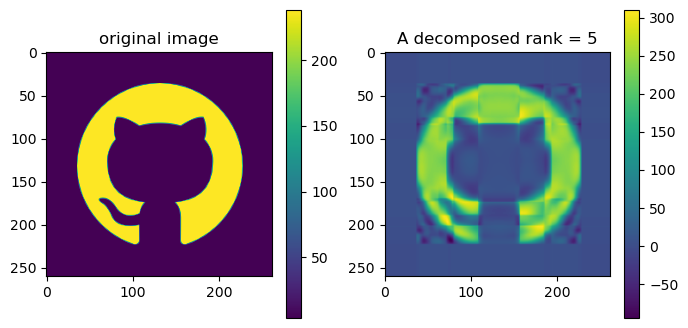

In [67]:
plot_matrices([A,A_decomp],titles=['original image', 'A decomposed rank = %i'%s])

To reconstruct the image such that it is recognizable albeit blurry, we just need $s$ component matrices. Each of these component matrices can in turn be constructed from one column of $U$ (size = $m$), one column of $V$.T (size = $n$) and $n$ singular values. This is generally going to be smaller than $m\times n$ which is the data stored in the original image. We calculate this below.

In [68]:
comp_data = (m+n+n)*s
orig_data = m*n
compression_factor = orig_data/comp_data
print('compressed file stores',comp_data)
print('original file had',orig_data)
print('compression factor is',compression_factor,'for rank =',s)

compressed file stores 3920
original file had 68120
compression factor is 17.377551020408163 for rank = 5


## 2a)

6 parameters to describe the radial velocity of the star:

- the orbital period $P$ (in days)

- the planet mass $M_P$ (in Jupiter masses)

- the eccentricity $e$ (from 0 for circular orbits to a maximum of 1)

- argument of periastron $\omega$ (in radians) (this determines the orientation of the ellipse relative to the plane of the sky)

- the time of pericenter $t$ (days)

- an overall velocity offset $v$ (m/s)

Prepare MCMC results for later comparison to Levenberg-Marquardt results. We copy-pasted the cells for the Metropolis-Hastings exercise solutions.

In [69]:
def rv(t, P, x):
    # Calculates the radial velocity of a star orbited by a planet
    # at the times in the vector t
    
    # extract the orbit parameters
    # P, t and tp in days, mp in Jupiter masses, v0 in m/s  
    mp, e, omega, tp, v0 = x
        
    # mean anomaly
    M = 2*np.pi * (t-tp) / P
    
    # velocity amplitude
    K = 204 * P**(-1/3) * mp  / np.sqrt(1.0-e*e) # m/s
    
    # solve Kepler's equation for the eccentric anomaly E - e * np.sin(E) = M
    # Iterative method from Heintz DW, "Double stars", Reidel, 1978
    # first guess
    E = M + e*np.sin(M)  + ((e**2)*np.sin(2*M)/2)
    while True:
        E0 = E 
        M0 = E0 - e*np.sin(E0)
        E = E0 + (M-M0)/(1.0 - e*np.cos(E0))
        if np.max(np.abs((E-E0))) < 1e-6:
            break
        
    # evaluate the velocities
    theta = 2.0 * np.arctan( np.sqrt((1+e)/(1-e)) * np.tan(E/2))
    vel = v0 + K * ( np.cos(theta + omega) + e * np.cos(omega))
    
    return vel

Acceptance fraction = 0.39964


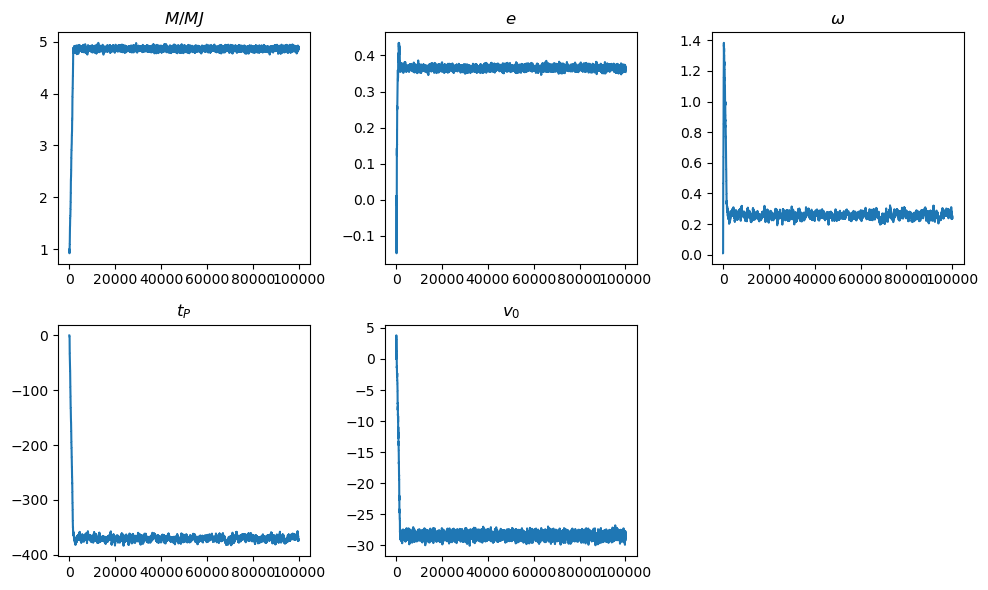

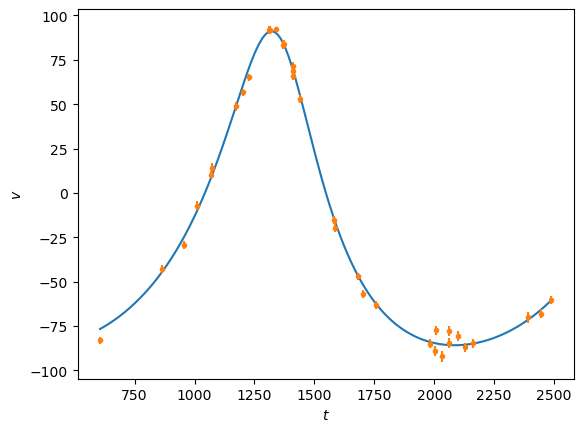

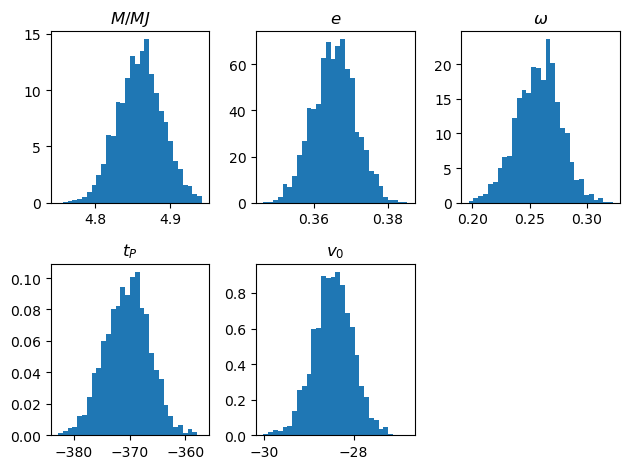

Best-fit parameters are:  [ 4.85988530e+00  3.65378701e-01  2.57570597e-01 -3.70429422e+02
 -2.84580505e+01]
final chisq is -32.85729179067494


In [3]:
def f(x, tobs, vobs, eobs):
    chisq = np.sum(((vobs-rv(tobs, P, x))/eobs)**2)
    return -chisq/2

# Observations
# These are for HD145675 from Butler et al. 2003
tobs, vobs, eobs = np.loadtxt('rvs.txt', unpack=True)

# Number of samples to generate
N = 10**5
a = np.zeros((N, 5))

# initial guess
# P, mp, e, omega, tp, v0 
P = 1724
a[0] = [1.0, 0.01, 0.01, 0.01, 0.01]
# and the widths for the jumps
widths = (0.03, 0.03, 0.03, 3.0, 1.0)

count = 0

for i in range(N-1):
    
    # Proposal
    ii = np.random.randint(0, 5)
    a_try = np.copy(a[i])
    a_try[ii] += rng.normal(scale = widths[ii])

    #x_try[2] = (x_try[2]) % 1   # keep e between zero and 1
    
    # Accept the move or stay where we are
    u = rng.uniform()
    if u <= np.exp(f(a_try, tobs,vobs,eobs) - f(a[i], tobs,vobs,eobs)):
        a[i+1] = np.copy(a_try)
        count = count + 1
    else:
        a[i+1] = np.copy(a[i])


print("Acceptance fraction = %g" % (count/N,))

plt.figure(figsize=(10,6))

titles = (r'$M/MJ$', r'$e$', r'$\omega$', r'$t_P$', r'$v_0$')
for i, title in enumerate(titles):
    plt.subplot(2,3,i+1)
    plt.title(title)
    plt.plot(list(range(N)), a[:, i])
plt.tight_layout()
plt.show()

plt.clf()
t = np.linspace(tobs[0], tobs[-1], 1000)
plt.plot(t, rv(t,P, a[-1]), 'C0')
plt.plot(tobs, vobs, 'C1.')
plt.errorbar(tobs, vobs, eobs, fmt='none', ecolor='C1')
plt.ylabel(r'$v$')
plt.xlabel(r'$t$')
plt.show()

# Reject the burn in phase
a1 = a[int(0.5*N):]

plt.clf()
for i, title in enumerate(titles):
    plt.subplot(2,3,i+1)
    plt.title(title)
    plt.hist(a1[:, i], density=True, bins=30)
plt.tight_layout()
plt.show()

a_MC = np.mean(a1,axis=0)
print("Best-fit parameters are: ", a_MC)
chisq_MC = f(a_MC, tobs, vobs, eobs)
print('final chisq is', chisq_MC)

chisq = 29407.6, a=(0.761412, -0.366845, -8.63816), lam = 0.001
chisq = 23758.6, a=(1.22729, 0.183013, -7.84783), lam = 0.0001
chisq = 18086.7, a=(1.86155, -0.132272, -6.89859), lam = 1e-05
chisq = 13825.6, a=(2.43029, 0.0567897, -8.1112), lam = 1e-06
chisq = 11948.7, a=(2.85217, -0.0662242, -5.81883), lam = 1e-07
chisq = 7638.58, a=(3.18723, 0.0984219, -5.64811), lam = 1e-08
chisq = 4920.83, a=(3.5067, 0.177964, -6.04195), lam = 1e-09
chisq = 3127.75, a=(3.76865, 0.232409, -6.0162), lam = 1e-10
chisq = 2008.3, a=(3.98265, 0.267874, -6.01796), lam = 1e-11
chisq = 1301.86, a=(4.15583, 0.292237, -6.02093), lam = 1e-12
chisq = 853.856, a=(4.2954, 0.30962, -6.02314), lam = 1e-13
chisq = 568.885, a=(4.40759, 0.322367, -6.02459), lam = 1e-14
chisq = 387.256, a=(4.49762, 0.33191, -6.0255), lam = 1e-15
chisq = 271.332, a=(4.5698, 0.339168, -6.02607), lam = 1e-16
chisq = 197.271, a=(4.6276, 0.344755, -6.02641), lam = 1e-17
chisq = 149.918, a=(4.67387, 0.349098, -6.0266), lam = 1e-18
chisq = 119

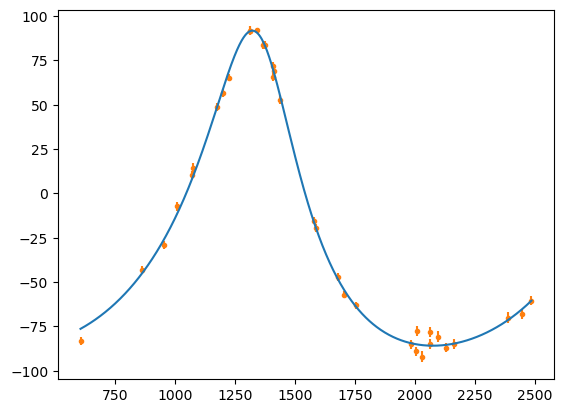

In [4]:
# Levenberg-Marquardt

def rv_A(a,P,t):
    ''' Calculates the radial velocity of a star orbited by a planet
    at the times in the vector t, same as rv. However, it ALSO computes
    the derivative with respect to the parameters'''
    
    # extract the orbit parameters
    # P, t and tp in days, mp in Jupiter masses, v0 in m/s 
    a0,a1,a2,a3,a4 = a 
    
    v = rv(t,P,a)
    
    # specify small step in parameter space for finite differences
    eps = 1e-4
    b = a*(1+eps)
    
    # extract new orbit parameters
    # P, t and tp in days, mp in Jupiter masses, v0 in m/s
    b0,b1,b2,b3,b4 = b
    
    # calculate radial velocity at small displacement in parameter space
    v0 = rv(t,P,(b0,a1,a2,a3,a4))
    v1 = rv(t,P,(a0,b1,a2,a3,a4))
    v2 = rv(t,P,(a0,a1,b2,a3,a4))
    v3 = rv(t,P,(a0,a1,a2,b3,a4))
    v4 = rv(t,P,(a0,a1,a2,a3,b4))
    
    A =  np.zeros([len(t), len(a)])
    #Populate A columns with derivatives wrt parameters
    A[:,0] = (v0 - v)/(b0 - a0)/eobs
    A[:,1] = (v1 - v)/(b1 - a1)/eobs
    A[:,2] = (v2 - v)/(b2 - a2)/eobs
    A[:,3] = (v3 - v)/(b3 - a3)/eobs
    A[:,4] = (v4 - v)/(b4 - a4)/eobs
    return v, A

# starting point
a0 = np.array([1,0.01,0.01,0.01,0.01]) 
#orbital period
P = 1724
a = a0
chisq1 = 1.0
chisq = 1e99
lam = 1e-3
# keep going while chisq is dropping
while chisq > 1e-6:
    # compute the update to the parameters
    v, A = rv_A(a, P, tobs)
    r = (vobs-v)/eobs
    chisq = np.sum(r**2)
    lhs = A.T@A
    lhs = lhs@(np.identity(len(a))*(1+lam))
    rhs = A.T@r
    da = np.linalg.inv(lhs)@rhs
    # calculate the chisq associated with the new parameters
    # artificially reduce step by alpha
    alpha = 0.2
    a1 = a + da*0.2
    v1, A1 = rv_A(a1, P, tobs)
    r1 = (vobs-v1)/eobs
    chisq1 = np.sum(r1**2)
    print("chisq = %lg, a=(%lg, %lg, %lg), lam = %lg" % (chisq1 ,a1[0], a1[1], a1[2], lam))
    # accept if chisq decreases; reject if it increases
    if chisq1 > chisq:
        lam = lam * 10
    else:
        lam = lam / 10
        a = a1
        # if the improvement in chisq becomes too small then exit
        if chisq-chisq1 < 1e-3:
            break
    
print("a-a0 =", a-a0)

a_LM = np.copy(a)
chisq_LM = f(a_LM, tobs, vobs, eobs)
print('final chisq is', chisq_LM)

print("Best-fit parameters are: ", a_LM)


plt.errorbar(tobs, vobs, eobs, fmt='none', ecolor='C1')
plt.plot(tobs, vobs, 'C1.')
tt = np.linspace(tobs[0], tobs[-1], 1000)
vv = rv(tt, P,a_LM)
plt.plot(tt,vv)

plt.show()

Compare MCMC with Levenberg-Marquardt on the same plot

-chi squared/2 for LM -32.85350840327968
-chi squared/2 for MCMC -32.85729179067494
LM - MCMC 0.0037833873952592967


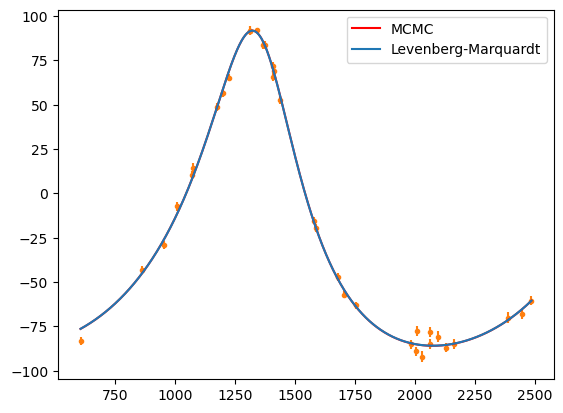

In [5]:
print('-chi squared/2 for LM', chisq_LM)
print('-chi squared/2 for MCMC', chisq_MC)
print('LM - MCMC', chisq_LM-chisq_MC)

plt.errorbar(tobs, vobs, eobs, fmt='none', ecolor='C1')
plt.plot(tobs, vobs, 'C1.')
tt = np.linspace(tobs[0], tobs[-1], 1000)
v_MC = rv(tt,P,a_MC)
v_LM = rv(tt,P,a_LM)
plt.plot(tt,v_MC,label='MCMC',c='r')
plt.plot(tt,v_LM,label='Levenberg-Marquardt')
plt.legend()
plt.show()

Both MCMC and Levenberg-Marquardt produce similar results but Levenberg-Marquardt is better able to minimize chi squared values and runs alot faster.

## 2b)

Calculate the covariance matrix for both methods

In [60]:
v_MC, A_MC = rv_A(a_MC,P,tobs)
v_LM, A_LM = rv_A(a_LM,P,tobs)

C_MC = np.linalg.inv(A_MC.T@A_MC)
C_LM = np.linalg.inv(A_LM.T@A_LM)

C_diff = C_LM-C_MC
titles = ['$M_p$', '$e$', '$\omega$', '$t_p$', '$v_0$']
var_MC = np.empty(len(titles))
var_LM = np.empty(len(titles))
diff = np.empty(len(titles))
for i in range(len(titles)):
    var_LM[i] = C_LM[i][i]
    var_MC[i] = C_MC[i][i]
    diff[i] = var_LM[i] - var_MC[i]
    
print('Variance')
data = [titles, var_LM,var_MC,diff]
pd.options.display.precision = 8
pd.DataFrame(data,index=pd.Index(['parameters','LM','MC','LM-MCMC']))


Variance


,0,1,2,3,4
parameters,$M_p$,$e$,$\omega$,$t_p$,$v_0$
LM,0.0008488,0.00002869,0.00037595,16.12876968,0.18356322
MC,0.00084846,0.00002866,0.00037636,16.16800184,0.18356769
LM-MCMC,0.00000035,0.00000003,-0.00000041,-0.03923216,-0.00000447


We see that the variance for MCMC is larger than for Levenberg-Marquardt for $\omega$,$t_p$ and $v_0$ and roughly the same for $M_p$ and $e$.